In [899]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [900]:
data=pd.read_excel('iris copy 2.xls')

In [901]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [902]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [903]:
data.shape

(150, 5)

In [904]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [905]:
#Checking missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [906]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [907]:
data['SL'].fillna((data['SL'].median()),inplace=True)
data['SW'].fillna((data['SW'].median()),inplace=True)
data['PL'].fillna((data['PL'].median()),inplace=True)

In [908]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

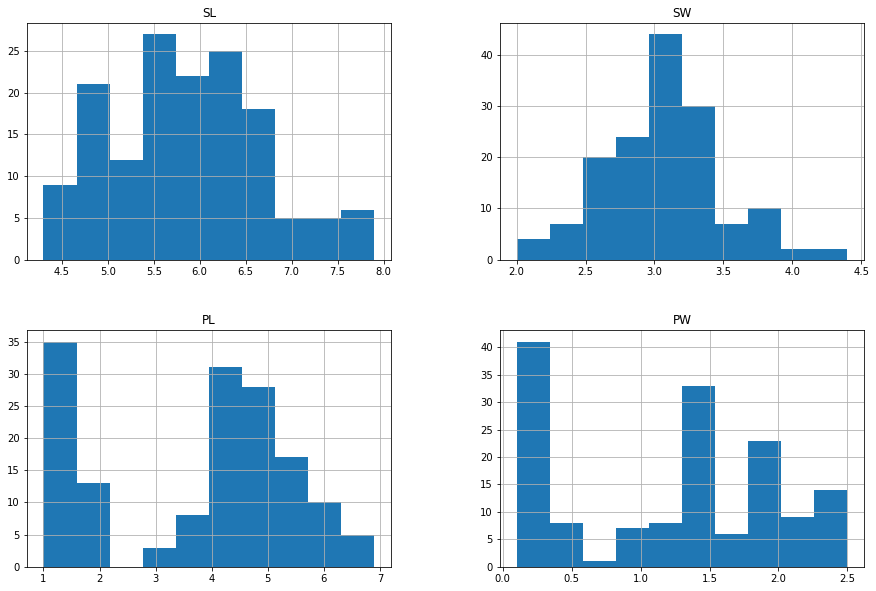

In [909]:
freqgraph=data.select_dtypes(include=["float64"])
freqgraph.hist(figsize=(15,10))
plt.show()

# Checking for Outliers

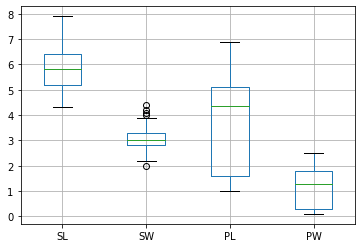

In [910]:
boxplot = data.boxplot(column=['SL', 'SW', 'PL', 'PW'])

<AxesSubplot:xlabel='SW'>

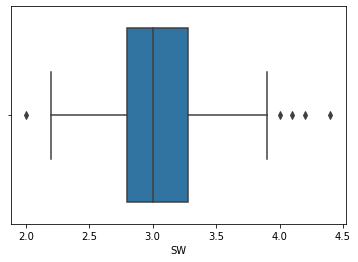

In [911]:
sns.boxplot(data['SW'])

In [912]:
#Removing outliers

Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1 =',Q1,'\nQ2 =',Q2,'\nQ3 =',Q3)

Q1 = 2.8 
Q2 = 3.0 
Q3 = 3.25


In [913]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR=',IQR,'\nlow_lim =',low_lim,'\nup_lim =',up_lim)

IQR= 0.4500000000000002 
low_lim = 2.1249999999999996 
up_lim = 3.9250000000000003


In [914]:
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [915]:
ind=data['SW']>up_lim
ind1=data['SW']<low_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [916]:
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [917]:
data.drop([14, 15, 32, 33,60],inplace=True)

# Scaling

In [918]:
from sklearn import preprocessing

In [919]:
x=data.drop('Classification',axis=1)

In [920]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [921]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)

In [922]:
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

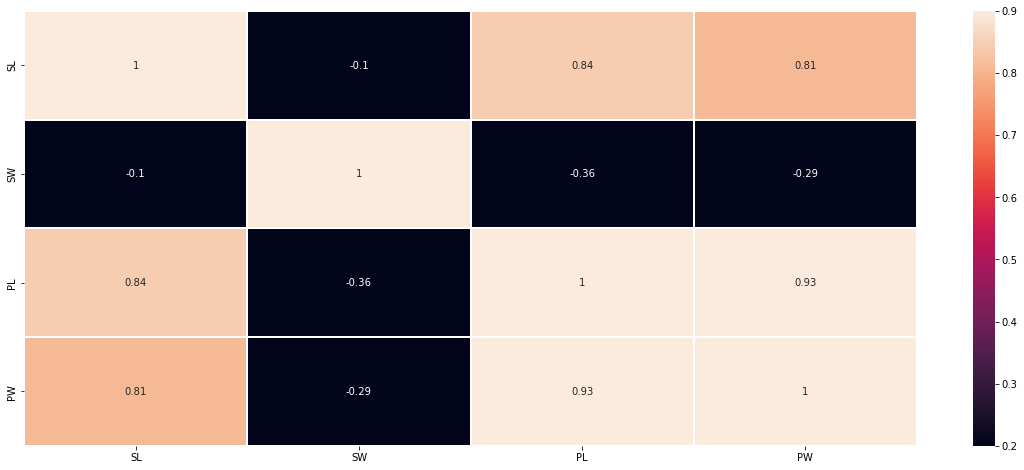

In [923]:
#Feature Reduction
corr=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=0.2,vmax=0.9,annot=True,linewidth=0.2)

Since we dont have enough columns,feature reduction is not required.

In [924]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data['class']=label_en.fit_transform(data['Classification'])

In [925]:
data=data.drop(['Classification'],axis=1)

In [926]:
y=data['class']

In [927]:
y.value_counts()

2    50
1    49
0    46
Name: class, dtype: int64

In [928]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [929]:
x_train.shape

(116, 4)

In [930]:
y_train.shape

(116,)

In [931]:
x_test.shape

(29, 4)

In [932]:
y_test.shape

(29,)

# MODELS

# Logistic Regression

In [933]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
pred= log_model.predict(x_test)

In [934]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred,average='micro'),4))

accuracy is:  0.931
Precision is:  0.931
recall score is:  0.931
f1 score is:  0.931


In [948]:
#Confusion matrix
confusion_matrix(y_test,pred)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 2, 9]])

# RandomForest

In [936]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred1=rf.predict(x_test)

In [937]:
print('accuracy is: ',round(accuracy_score(y_test,pred1),4))
print('Precision is: ',round(precision_score(y_test,pred1,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred1,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred1,average='micro'),4))

accuracy is:  0.8966
Precision is:  0.8966
recall score is:  0.8966
f1 score is:  0.8966


In [949]:
confusion_matrix(y_test,pred1)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

# KNN

In [939]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [940]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931]

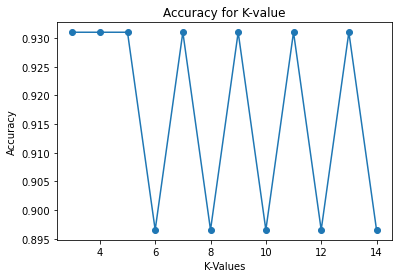

In [941]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [942]:
classifier= KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [950]:
print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,y_predict,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_predict,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_predict,average='micro'),4))

accuracy is:  0.931
Precision is:  0.931
recall score is:  0.931
f1 score is:  0.931


In [944]:
confusion_matrix(y_test,y_predict)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

# SVM

In [945]:
from sklearn.svm import SVC


svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred2  =svm_linear.predict(x_test)

print('accuracy is: ',round(accuracy_score(y_test,pred2),4))
print('Precision is: ',round(precision_score(y_test,pred2,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred2,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred2,average='micro'),4))


accuracy is:  0.8966
Precision is:  0.8966
recall score is:  0.8966
f1 score is:  0.8966


# Decision tree

In [946]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
pred3= dt_model.predict(x_test)

In [947]:
print('accuracy is: ',round(accuracy_score(y_test,pred3),4))
print('Precision is: ',round(precision_score(y_test,pred3,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred3,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred3,average='micro'),4))

accuracy is:  0.8966
Precision is:  0.8966
recall score is:  0.8966
f1 score is:  0.8966


In [951]:
confusion_matrix(y_test,pred3)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

According to the above models,KNN is the most suitable model for this dataset